In [1]:
# Importing libraries
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 400000000
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Converting relevant tif images to PNG images
im = Image.open('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees.tif')
im.convert('RGB').save('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees.png')
del im

In [5]:
# load image with alpha channel
img = cv2.imread('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees.png', cv2.IMREAD_UNCHANGED)


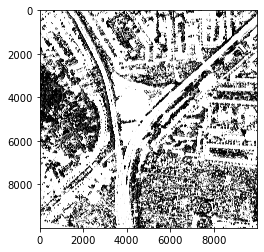

In [9]:
image_copy = img.copy()

black_pixels_mask = np.all(img == [0, 0, 0], axis=-1)

non_black_pixels_mask = np.any(img != [0, 0, 0], axis=-1)  
# or non_black_pixels_mask = ~black_pixels_mask

image_copy[black_pixels_mask] = [255, 255, 255]
image_copy[non_black_pixels_mask] = [0, 0, 0]

plt.imshow(image_copy)
plt.show()

In [3]:
# Converting the Roads raster to a binary mask

# load image with alpha channel
img = cv2.imread('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees.png', cv2.IMREAD_UNCHANGED)

# extract alpha channel
alpha = img[:,:,:]

# threshold alpha channel
alpha = cv2.threshold(alpha, 0, 255, cv2.THRESH_BINARY)[1]

#Inverting the mask
mask = cv2.bitwise_not(alpha)

# save output
cv2.imwrite('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees_mask.png', mask)

True

In [4]:
#Applying the mask to the image

img = cv2.imread('F:/Berlin-DOP_2020/Processed images/Masked_dataset/Maskeddop10rgbi_391_5824_1_be_2020.png')
mask = cv2.imread('F:/Berlin-DOP_2020/Processed images/dop10rgbi_391_5824_1_be_2020_trees_mask.png',0)
res = cv2.bitwise_and(img,img,mask = mask)

# Saving the putput
cv2.imwrite('F:/Berlin-DOP_2020/Processed images/Trees/Maskeddop10rgbi_391_5824_1_be_2020.png', res)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-dn5w5exm\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
